# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@". 

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv("../data/states_edu.csv")
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [3]:
#Rename some of the columns to make the dataset more readable
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

#Find what proportion of the rows have NaN entries for 4th grade math scores
print(df.shape)
print(df["AVG_MATH_4_SCORE"].isna().sum())
print(df["AVG_MATH_4_SCORE"].isna().sum() / df.shape[0])

#Remove rows with NaN entries for 4th grade math scores as we don't care about them
#While this does remove a lot of entries, the 565 remaining data points should be enough
df.dropna(subset="AVG_MATH_4_SCORE", inplace=True)
#Check that the removal worked properly
print(df.shape)
print(df["AVG_MATH_4_SCORE"].isna().sum())






(1715, 25)
1150
0.6705539358600583
(565, 25)
0


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: ***Grade 4 Math***

How many years of data are logged in our dataset? 

In [4]:
# @@@ 1
# Your Code

# Note that we are only considering the remaning datapoints left after cleanup, not the original set
print(df["YEAR"].nunique(), "unique years (see comment)")

13 unique years (see comment)


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [5]:
# @@@ 2
mi = df[df["STATE"] == "MICHIGAN"]
mi_mean_math_4 = mi["AVG_MATH_4_SCORE"].mean()

oh = df[df["STATE"] == "OHIO"]
oh_mean_math_4 = oh["AVG_MATH_4_SCORE"].mean()

print("MI:", mi_mean_math_4)
print("OH:", oh_mean_math_4)
print()

if mi_mean_math_4 > oh_mean_math_4:
    print("MI > OH")
elif mi_mean_math_4 < oh_mean_math_4:
    print("OH > MI")
else:
    print("MI == OH")



MI: 234.36363636363637
OH: 239.45454545454547

OH > MI


Find the average for your chosen test across all states in 2019

In [6]:
# @@@ 3

year_2019 = df[df["YEAR"] == 2019]
print(year_2019["AVG_MATH_4_SCORE"].mean())

239.9433962264151


For each state, find a maximum value for your chosen test score

In [7]:
# @@@ 4
states = df.groupby("STATE")
print(states["AVG_MATH_4_SCORE"].max())

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [16]:
# @@@ 5

df["enroll_all_agregate"] = df[["ENROLL_ALL", "ENROLL_ALL_EST"]].mean(axis=1)
df["instruction_expenditure_per_student"] = df["INSTRUCTION_EXPENDITURE"] / df["enroll_all_agregate"]
df["total_revenue_per_student"] = df["TOTAL_REVENUE"] / df["enroll_all_agregate"]


#Ruh roh


Feature engineering justification: **The dataset's documentation mentioned that ENROLL_ALL and ENROLL_ALL_EST would be very similar values as they were just enrollment estimates from two separate organizations, so I figured I should average them to get a (hopefully) more accurate enrollment estimate and to lose fewer datapoints in the next step. I thought that instruction expenditure per student would be relevant for obvious reasons, so I created a new column for it, and I thought that total revenue per student would be the closest this dataset could come to estimating average income (I am assuming that wealthier states generate more revenue, which seems like a reasonable assumption), so I created a new column for it as well.**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, 'Average 4th Grade Math Score')

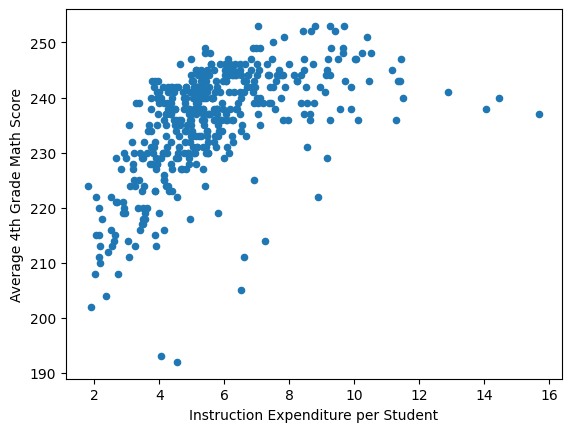

In [17]:
# @@@ 6

df.plot.scatter(x = "instruction_expenditure_per_student", y = "AVG_MATH_4_SCORE")
plt.xlabel("Instruction Expenditure per Student")
plt.ylabel("Average 4th Grade Math Score")


**There seems to be a fairly strong, linear, positive correlation between instruction expenditure per student (IEpS) and average fourth grade math score between IEpS = 0 and IEpS = 7, and no correlation between IEpS = 7 and IEpS = 16. It would also be reasonable to view this correlation as logarithmic. This patterns suggests that spending more on instruction is correlated with better fourth grade math scores with diminishing returns as the expenditure increases, especially past 7 (units?) per student.**

**Visualization 2**

Text(0, 0.5, 'Average 4th Grade Math Score')

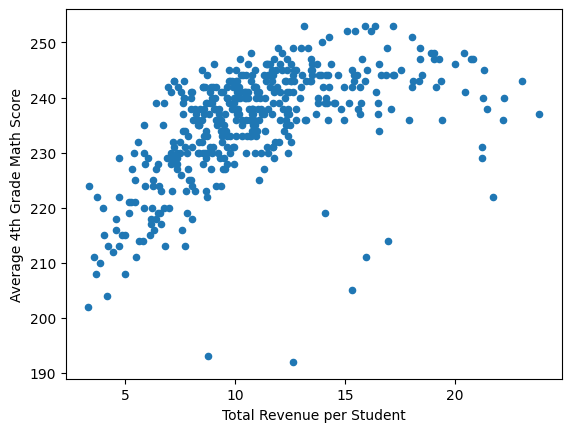

In [19]:
# @@@ 7

df.plot.scatter(x = "total_revenue_per_student", y = "AVG_MATH_4_SCORE")
plt.xlabel("Total Revenue per Student")
plt.ylabel("Average 4th Grade Math Score")


**The relationship between total revenue per student and fourth grade math scores follows a very similar pattern to the previous chart. There is a decently strong, linear, positive correlation from a revenue of 0 per student and 12 per student, after which there is little no correlation. Again, a logarithmic model might fit this data well, and would likely be more realistic if there were a causal relationship.**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
# @@@ 8

X = df[["total_revenue_per_student", "instruction_expenditure_per_student"]].dropna()
y = df.loc[X.index]["AVG_MATH_4_SCORE"]
y.fillna(y.median(), inplace=True)

In [62]:
# @@@ 9 

X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [63]:
# @@@ 10
# import your sklearn class here
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [76]:
# @@@ 11
# create your model here

model = make_pipeline(PolynomialFeatures(3), LinearRegression())

#I had to look this up because I wanted something other than a linear model, sorry if I wasn't supposed to

In [70]:
model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [71]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [75]:
# @@@ 12
print(model.score(X_test, y_test))

0.5504175841157268


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

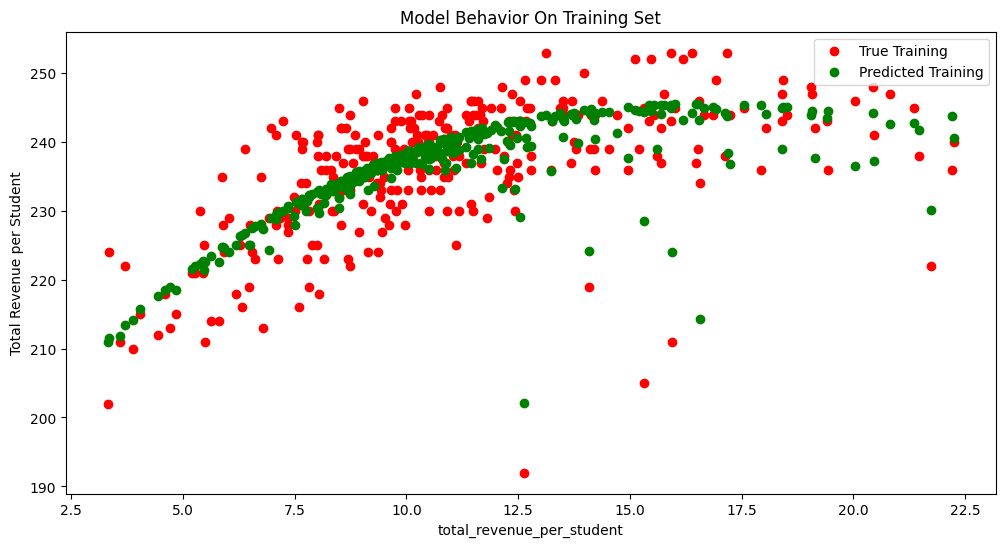

In [73]:
# @@@ 13

col_name = 'total_revenue_per_student'


f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Total Revenue per Student')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

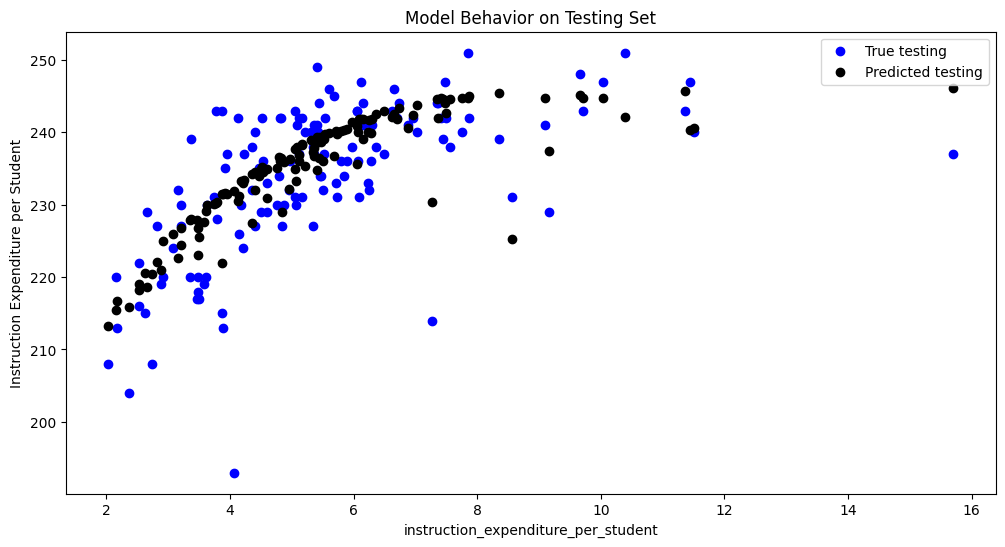

In [74]:
# @@@ 14


col_name = 'instruction_expenditure_per_student'


f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Instruction Expenditure per Student')
plt.title("Model Behavior on Testing Set")